In [4]:
import numpy as np
from mcmc.mcmc import StructureMCMC
from mcmc.data import SyntheticDataset
from mcmc.proposals import GraphProposal
from mcmc.scores import BGeScore

# for reproducibility
np.random.seed(46)

In [14]:
# setup synthetic data

num_nodes = 4
node_labels = [chr(ord('a') + i) for i in range(num_nodes)]
num_obs = 200
degree = 2

synthetic_data = SyntheticDataset(num_nodes=num_nodes, num_obs=num_obs, node_labels=node_labels, degree=degree)

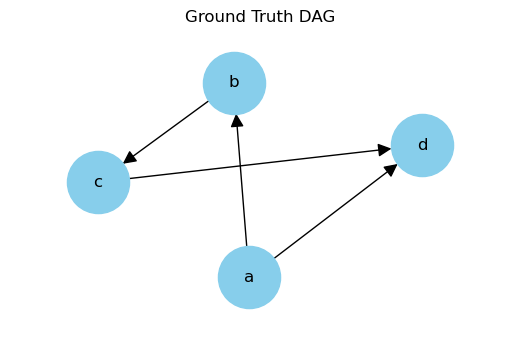

In [21]:
# visualise ground truth DAG
from mcmc.utils.graph_utils import plot_graph_from_adj_mat
plot_graph_from_adj_mat(synthetic_data.adj_mat.values, node_labels, title="Ground Truth DAG")

In [22]:
synthetic_data.data

,a,b,c,d
0,3.114615,6.145658,-13.957488,-22.727403
1,-0.477092,-2.386086,6.373927,7.445316
2,-0.741519,-2.505112,6.641514,9.848579
3,-1.452361,-2.562321,5.677607,9.652684
4,-0.327210,-1.925537,4.189944,7.199165
...,...,...,...,...
195,-0.412729,-2.701372,8.456166,10.912477
196,-0.367259,-0.611558,0.607488,0.546532
197,-1.301451,-1.493103,4.128818,9.412993
198,1.424285,4.380491,-9.160979,-13.489298


In [23]:
# setup random initial graph

initial_graph = np.random.choice([0,1], size=(num_nodes, num_nodes))*np.tri(num_nodes, num_nodes, -1)
p = np.random.permutation(num_nodes)
# shuffle
initial_graph = initial_graph[p, :]
initial_graph = initial_graph[:, p]

In [24]:
# setup mcmc

n_iterations = 100000
score = BGeScore(synthetic_data.data, initial_graph)
proposal = GraphProposal(initial_graph)
M = StructureMCMC(initial_graph, n_iterations, proposal, score)

In [25]:
# run experiment

mcmc_results, acceptance = M.run()
graphs = M.get_mcmc_res_graphs(mcmc_results)
print('Acceptance_ratio:', acceptance)

Acceptance_ratio: 0.1846


In [27]:
from mcmc.utils.graph_utils import generate_key_from_adj_matrix

graphs = M.get_mcmc_res_graphs(mcmc_results)

key = generate_key_from_adj_matrix(synthetic_data.adj_mat.values)
keys, counts = np.unique([generate_key_from_adj_matrix(g) for g in graphs], return_counts=True)
print(key in keys)

True


35


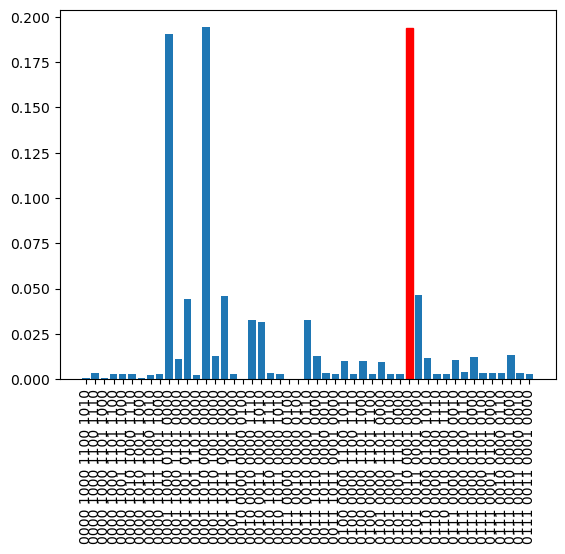

In [46]:
from matplotlib import pyplot as plt

bars = plt.bar(range(len(keys)), counts/len(graphs))
plt.xticks(range(len(keys)), keys, rotation=90);
bars[np.where(keys==key)[0][0]].set_color('red')